In [62]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'fifa19eda:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F674792%2F1186717%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240512%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240512T075437Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D97ddd4c6d6e289de753bd51f5c33d76810c3a1fea072eaa17f9fc388118fc08129daff0d4438c35e472bade481d4fb2bb4304824aed1d10aa30af3c09ecb90397da7b0381612d402e012ed724e839a5389a5da5183fc63440e5f1766b69a1ee4580ef0d991bf8e21631eb5d2a7be13e74773287a4b6939d55901080e7e93f51762832732ee9db15fdeff3c483b694d9d6bb8fbc4a10520cb33f3db2d0add88f406b2dd9a6e4154ab6bd20c13d41facc1f4c2021c3458e66a8edf90263f13c8dd8a012b02e686fe60ad404e9a7ca7377186adbeabd0a6b65eecdef188d2680ac448cc068cab39ea13b317526a707e3579e548fcfef5de3da307fd121c5584054c'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 619172 bytes downloaded
Downloaded and uncompressed: fifa19eda
Data source import complete.


In [63]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fifa19eda/fifa_eda.csv


In [64]:
df=pd.read_csv("../input/fifa19eda/fifa_eda.csv")
print(df.shape)

(18207, 18)


In [65]:
df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,60.0,1.0,Right,1.0,2.0,CM,2017,2019-01-01,5.750000,134.0,143.0
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,60.0,1.0,Right,1.0,2.0,ST,2018,2020-01-01,6.250000,170.0,113.0
18204,241638,B. Worman,16,England,47,67,Cambridge United,60.0,1.0,Right,1.0,2.0,ST,2017,2021-01-01,5.666667,148.0,165.0
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,60.0,1.0,Right,1.0,2.0,RW,2018,2019-01-01,5.833333,154.0,143.0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     17955 non-null  float64
 8   Wage                      18207 non-null  float64
 9   Preferred Foot            18207 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Skill Moves               18159 non-null  float64
 12  Position                  18207 non-null  object 
 13  Joined                    18207 non-null  int64  
 14  Contra

# Edit Dtype of all the columns

Change Date to DATETIME format

In [67]:
df["Contract Valid Until"] = pd.to_datetime(df['Contract Valid Until'])

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        18207 non-null  int64         
 1   Name                      18207 non-null  object        
 2   Age                       18207 non-null  int64         
 3   Nationality               18207 non-null  object        
 4   Overall                   18207 non-null  int64         
 5   Potential                 18207 non-null  int64         
 6   Club                      17966 non-null  object        
 7   Value                     17955 non-null  float64       
 8   Wage                      18207 non-null  float64       
 9   Preferred Foot            18207 non-null  object        
 10  International Reputation  18159 non-null  float64       
 11  Skill Moves               18159 non-null  float64       
 12  Position          

In [69]:
df["Contract Valid Until"].max()

Timestamp('2026-01-01 00:00:00')

In [70]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


# Removing NULL Values

In [71]:
df.isnull().sum()

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64

In [72]:
#df_try is just a Dataset for my refrence.

In [73]:
# Let's focus on CLUB, International Reputation , Skill Moves , Contract Valid Until and VALUE columns first
# if all columns have null values present then we will remove it
#np.where works like this np.where("condition", "if_true", "if_false")
df_try1 = df.copy()
df_try1["compare"] = np.where(df_try1["Value"].isna()
                              & df_try1["Club"].isna()
                              & df_try1["International Reputation"].isna()
                              & df_try1["Skill Moves"].isna()
                              & df_try1["Contract Valid Until"].isna() , "remove it" , "don't remove it")
df_try1[df_try1["compare"] == "remove it"]

# We found out there are no such columns where all null values are present

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause,compare


In [74]:
# Let's focus on CLUB,Contract Valid Until,and VALUE columns first
# if all three columns have null values present then we assign some values to it because it migh haapen that player has not been assigned to any Club

#np.where works like this np.where("condition", "if_true", "if_false")

df_club_value_contract = df.copy()
df_club_value_contract["compare"] = np.where(df_club_value_contract["Value"].isna()
                              & df_club_value_contract["Club"].isna()
                              & df_club_value_contract["Contract Valid Until"].isna(),
                              "remove it" , "don't remove it")


df_club_value_contract_NULL= df_club_value_contract[df_club_value_contract["compare"] == "remove it"]
df_club_value_contract_NULL

# We found out there are few columns where Club,Contract Valid Until and Values are null together

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause,compare
452,207439,L. Paredes,24,Argentina,80,85,NaN,NaN,0.0,Right,2.0,4.0,CM,2016,NaT,5.916667,165.0,4585.060806,remove it
538,156713,A. Granqvist,33,Sweden,80,80,NaN,NaN,0.0,Right,2.0,2.0,LCB,2016,NaT,6.333333,185.0,4585.060806,remove it
568,229909,A. Lunev,26,Russia,79,81,NaN,NaN,0.0,Right,1.0,1.0,GK,2016,NaT,6.166667,176.0,4585.060806,remove it
677,187347,I. Smolnikov,29,Russia,79,79,NaN,NaN,0.0,Right,2.0,3.0,RB,2016,NaT,5.833333,154.0,4585.060806,remove it
874,187607,A. Dzyuba,29,Russia,78,78,NaN,NaN,0.0,Right,2.0,3.0,ST,2016,NaT,6.416667,201.0,4585.060806,remove it
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17197,245164,V. Kaith,21,India,55,64,NaN,NaN,0.0,Right,1.0,1.0,GK,2016,NaT,6.166667,176.0,4585.060806,remove it
17215,243131,K. Taimi,26,Finland,55,57,NaN,NaN,0.0,Right,1.0,2.0,RB,2016,NaT,6.333333,187.0,4585.060806,remove it
17339,233526,S. Passi,23,India,54,63,NaN,NaN,0.0,Right,1.0,2.0,RM,2016,NaT,5.750000,143.0,4585.060806,remove it
17436,236452,D. Lalhlimpuia,20,India,54,67,NaN,NaN,0.0,Right,1.0,2.0,GK,2016,NaT,6.000000,168.0,4585.060806,remove it


In [75]:
pd.to_datetime("today")

Timestamp('2024-05-12 08:10:51.393925')

In [76]:
# Let's try to change in our trial dataset first
for ID in df_club_value_contract_NULL['ID']:
    df_try1.loc[df_try1["ID"] == ID,"Club"] = "Not Assigned"
    df_try1.loc[df_try1["ID"] == ID,"Value"] = 0.0
    df_try1.loc[df_try1["ID"] == ID,"Contract Valid Until"] = pd.to_datetime("today").strftime("%m/%d/%Y")


In [77]:
df_try1[df_try1["ID"]== 207439]
# It's working

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause,compare
452,207439,L. Paredes,24,Argentina,80,85,Not Assigned,0.0,0.0,Right,2.0,4.0,CM,2016,2024-05-12,5.916667,165.0,4585.060806,don't remove it


**Making Changes to *Real Datasets !!!***

In [78]:
for ID in df_club_value_contract_NULL['ID']:
    df.loc[df["ID"] == ID,"Club"] = "Not Assigned"
    df.loc[df["ID"] == ID,"Value"] = 0.0
    df.loc[df["ID"] == ID,"Contract Valid Until"] = pd.to_datetime("today").strftime("%m/%d/%Y")

In [79]:
df[df["ID"]== 207439]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
452,207439,L. Paredes,24,Argentina,80,85,Not Assigned,0.0,0.0,Right,2.0,4.0,CM,2016,2024-05-12,5.916667,165.0,4585.060806


In [80]:
df.isnull().sum()

ID                           0
Name                         0
Age                          0
Nationality                  0
Overall                      0
Potential                    0
Club                         0
Value                       11
Wage                         0
Preferred Foot               0
International Reputation    48
Skill Moves                 48
Position                     0
Joined                       0
Contract Valid Until        48
Height                       0
Weight                       0
Release Clause               0
dtype: int64

In [81]:
# Let's remove all rest of the NULL values present. As it is very less.
df.dropna(inplace=True)

In [82]:
df.isnull().sum()

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Skill Moves                 0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Release Clause              0
dtype: int64

# **EDA**

In [83]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [84]:
df.shape

(18148, 18)

**Finding Correlation between all the columns with each other**

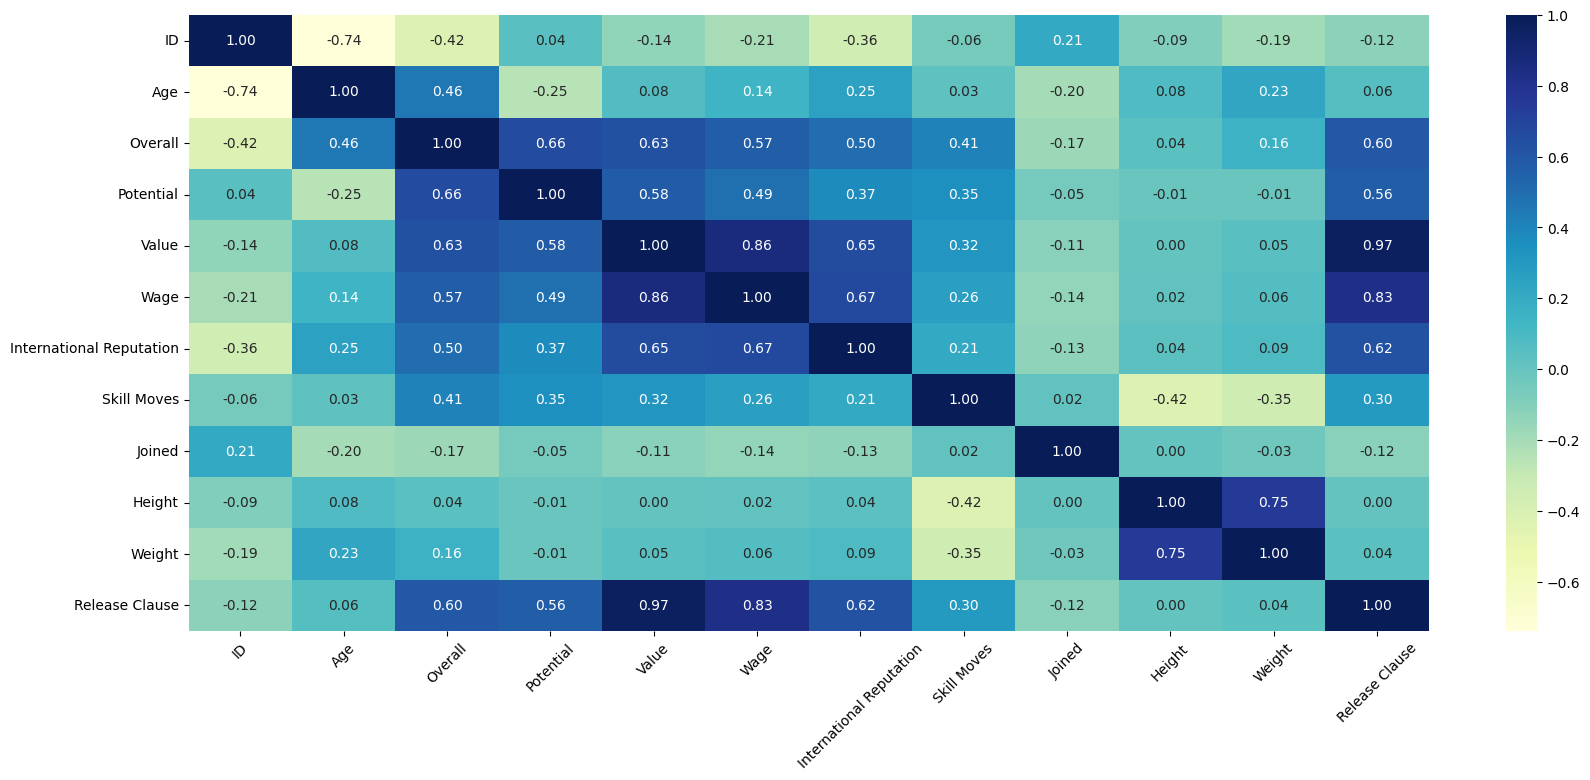

In [85]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assuming you have loaded the dataset into a DataFrame named 'df'
# You can load the dataset from a CSV file using: df = pd.read_csv('your_dataset.csv')

# Exclude non-numeric columns from the correlation matrix
numeric_df = df.select_dtypes(include=['number'])

# Create a heatmap of the correlation matrix
plt.figure(figsize=(20, 8))
dataplot = sns.heatmap(numeric_df.corr(), cmap="YlGnBu", annot=True, fmt=".2f", annot_kws={"size": 10})

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

**What do we find out by above figure?**
1. There is strong correlation between Internation Reputation and Wage.
2. **Skill Moves has NEGATIVE correlation with HEIGHT and WEIGHT**. It means more heighted or more weighted the player is lesser SKILL MOVES he will have.
3. AGE has little bit positive correlation with WAGE.
4. Whereas AGE has strong NEGATIVE CORRELATION with POTENTIAL but POSTIVE CORRELATION with OVERALL rating.
5. OVERALL RATING has strong POSITIVE CORRELATION with WAGE and RELEASE CLAUSE>

# Highest Wages Players

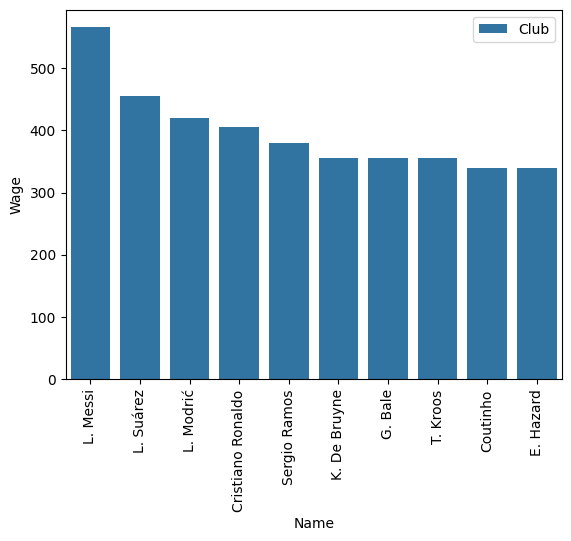

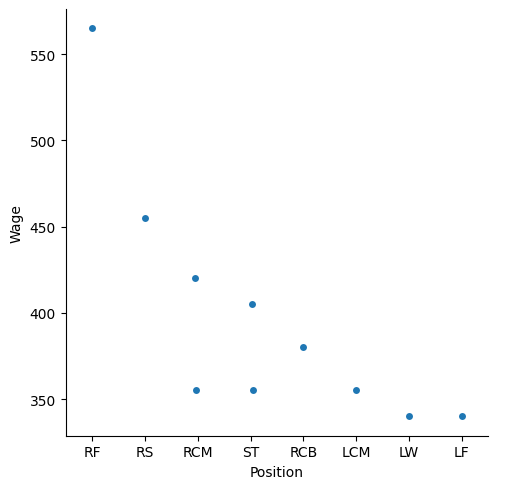

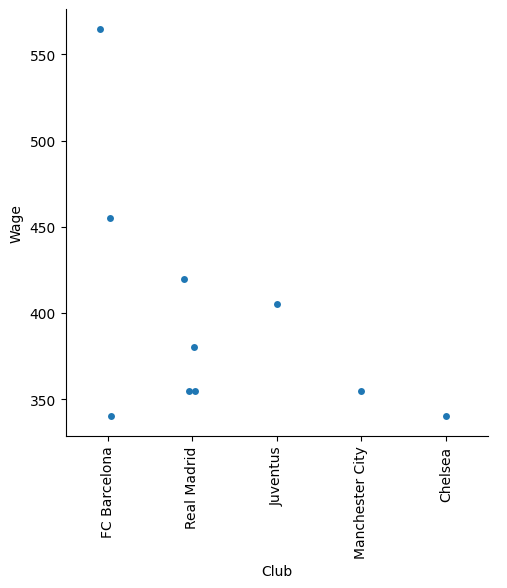

In [86]:
import matplotlib.pyplot as plt
df_max_wage = df.sort_values(by ='Wage', ascending = 0).head(10)
fig, ax = plt.subplots()
ax1 = sb.barplot(x="Name", y="Wage", data=df_max_wage, label="Club")
for item in ax1.get_xticklabels():
    item.set_rotation(90)
ax2 = sb.catplot(x="Position", y="Wage", data=df_max_wage)
ax3 = sb.catplot(x="Club", y="Wage", data=df_max_wage).set_xticklabels(rotation=90)


Highest Overall Players

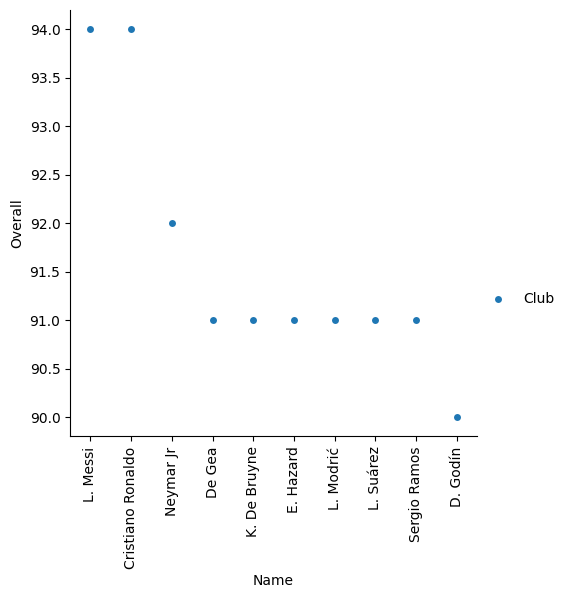

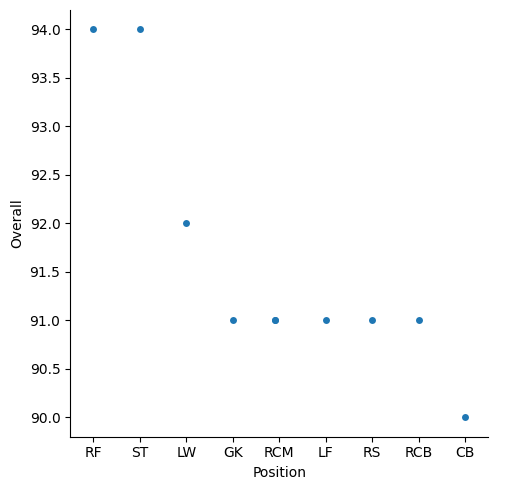

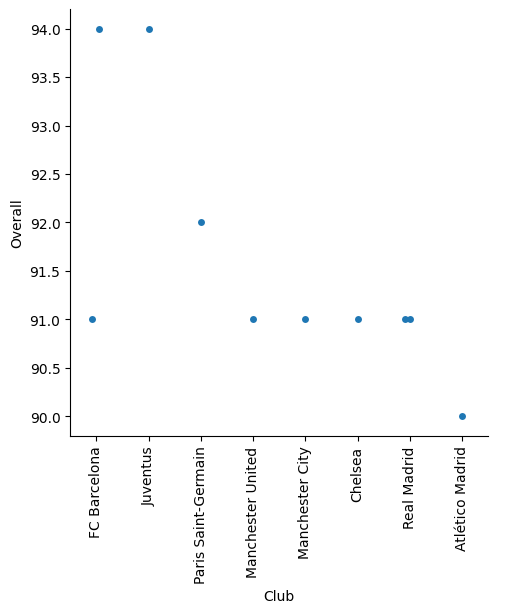

In [87]:
import matplotlib.pyplot as plt
df_max_Overall = df.sort_values(by ='Overall', ascending = 0).head(10)
ax1 = sb.catplot(x="Name", y="Overall", data=df_max_Overall, label="Club").set_xticklabels(rotation=90)
ax2 = sb.catplot(x="Position", y="Overall", data=df_max_Overall)
ax3 = sb.catplot(x="Club", y="Overall", data=df_max_Overall).set_xticklabels(rotation=90)

# Relation Between Value,Wage,Release Clause

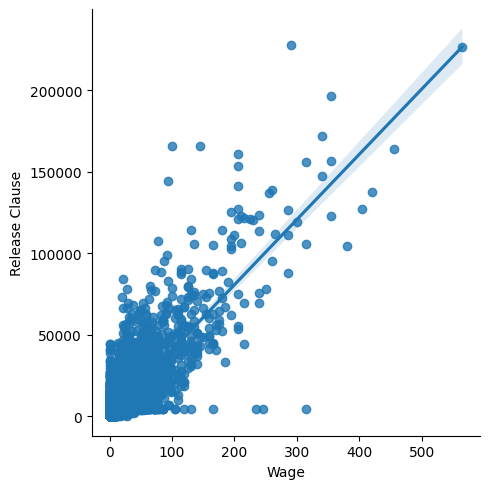

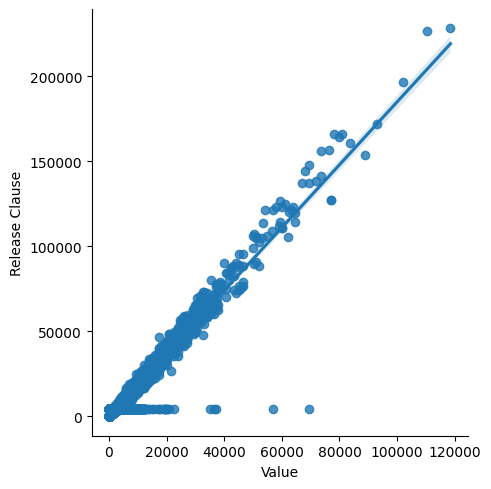

In [88]:
sb.lmplot(x='Wage',y='Release Clause',data=df)
sb.lmplot(x='Value',y='Release Clause',data=df)

# Most Players as per Nationality

In [89]:
df_nationality_counts = df["Nationality"].value_counts()
df_nationality_counts

Nationality
England                 1655
Germany                 1195
Spain                   1071
Argentina                936
France                   910
                        ... 
New Caledonia              1
Fiji                       1
São Tomé & Príncipe        1
United Arab Emirates       1
Botswana                   1
Name: count, Length: 164, dtype: int64

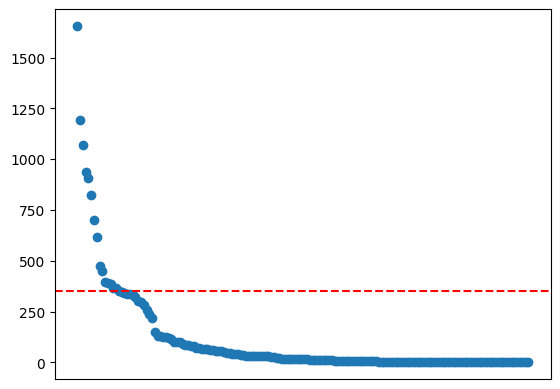

In [90]:
plt.scatter(df_nationality_counts.index,df_nationality_counts.values)
plt.xticks([])


plt.axhline(y = 350, color = 'r', linestyle = '--')

We will only take Nationality were the values (No. of Players) are more than 250.

In [91]:
df_top_nationality_counts = df_nationality_counts[df_nationality_counts > 250]
df_top_nationality_counts

Nationality
England                1655
Germany                1195
Spain                  1071
Argentina               936
France                  910
Brazil                  824
Italy                   699
Colombia                615
Japan                   475
Netherlands             452
Sweden                  396
China PR                390
Chile                   388
Republic of Ireland     368
Mexico                  365
United States           353
Poland                  348
Norway                  340
Saudi Arabia            336
Denmark                 335
Korea Republic          333
Portugal                322
Turkey                  303
Austria                 296
Scotland                283
Belgium                 259
Name: count, dtype: int64

Text(0.5, 1.0, 'No. of Players by Nations')

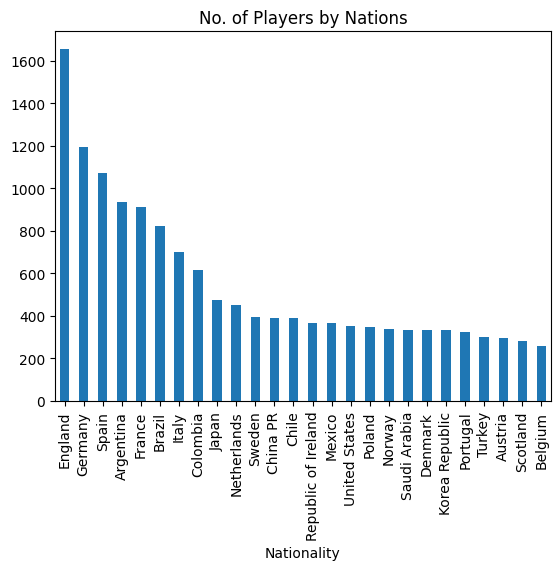

In [92]:
df_top_nationality_counts.plot.bar()
plt.title("No. of Players by Nations")

# **Modelling**

Let's Build a simple **Linear Regression Model** to Predict Wage of Players

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [94]:
# We will define independent variable columns and assign it to x
x = df[["Overall", "Potential", "Value", "International Reputation", "Release Clause"]]
x

,Overall,Potential,Value,International Reputation,Release Clause
0,94,94,110500.0,5.0,226500.0
1,94,94,77000.0,5.0,127100.0
2,92,93,118500.0,5.0,228100.0
3,91,93,72000.0,4.0,138600.0
4,91,92,102000.0,4.0,196400.0
...,...,...,...,...,...
18202,47,65,60.0,1.0,143.0
18203,47,63,60.0,1.0,113.0
18204,47,67,60.0,1.0,165.0
18205,47,66,60.0,1.0,143.0


In [95]:
# We will define dependent variable columns (which is Wage) and assign it to y
y = df[["Wage"]]
y

,Wage
0,565.0
1,405.0
2,290.0
3,260.0
4,355.0
...,...
18202,1.0
18203,1.0
18204,1.0
18205,1.0


In [96]:
#shapes of splitted data
print("X Shape:",x.shape)
print("Y Shape:",y.shape)


X Shape: (18148, 5)
Y Shape: (18148, 1)


In [97]:
# Split the Data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [98]:
#shapes of splitted data
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (14518, 5)
X_test: (3630, 5)
Y_train: (14518, 1)
Y_test: (3630, 1)


In [99]:
# Training the Model
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [100]:
# Predicting x_test values
y_pred=linreg.predict(x_test)
y_pred

array([[2.7683991 ],
       [4.55229961],
       [3.82228539],
       ...,
       [3.50275412],
       [4.43841545],
       [7.83005991]])

Evaluating our Model

# Accuracy of our Model

In [101]:
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 73.76


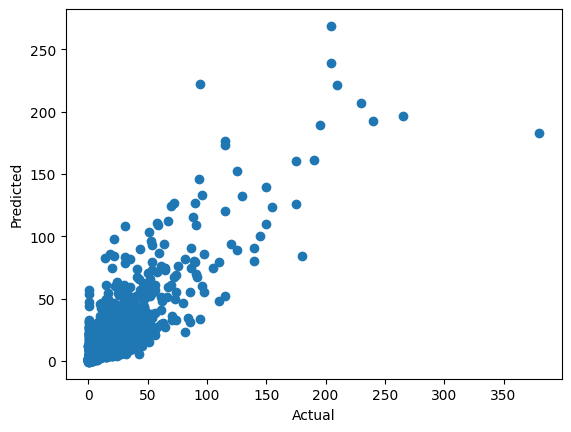

In [102]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

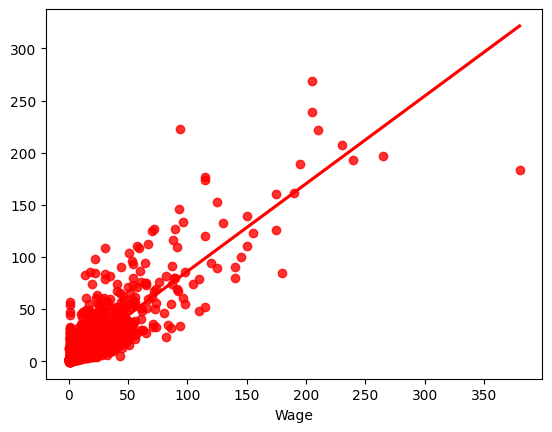

In [103]:
import seaborn as sns
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

Let us create a new data frame that contains actual values, predicted values, and differences between them so that we will understand how near the model predicts its actual value.

In [104]:
pred_df=pd.DataFrame({'Actual Value':y_test.values.flatten(),'Predicted Value':y_pred.flatten(),'Difference':((y_test.values)-y_pred).flatten()})
pred_df["Percentage Difference (%)"] = pred_df["Difference"]/pred_df["Actual Value"]*100
pred_df

,Actual Value,Predicted Value,Difference,Percentage Difference (%)
0,3.0,2.768399,0.231601,7.720030
1,4.0,4.552300,-0.552300,-13.807490
2,1.0,3.822285,-2.822285,-282.228539
3,3.0,5.181418,-2.181418,-72.713930
4,5.0,12.778924,-7.778924,-155.578486
...,...,...,...,...
3625,4.0,8.976848,-4.976848,-124.421205
3626,3.0,3.980091,-0.980091,-32.669716
3627,3.0,3.502754,-0.502754,-16.758471
3628,5.0,4.438415,0.561585,11.231691


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


{'whiskers': [<matplotlib.lines.Line2D at 0x789e5aa55c30>,
 'caps': [<matplotlib.lines.Line2D at 0x789e5aa56a40>,
 'boxes': [<matplotlib.lines.Line2D at 0x789e5aa56110>],
 'medians': [<matplotlib.lines.Line2D at 0x789e5aa56ce0>],
 'fliers': [<matplotlib.lines.Line2D at 0x789e6898bf70>],
 'means': []}

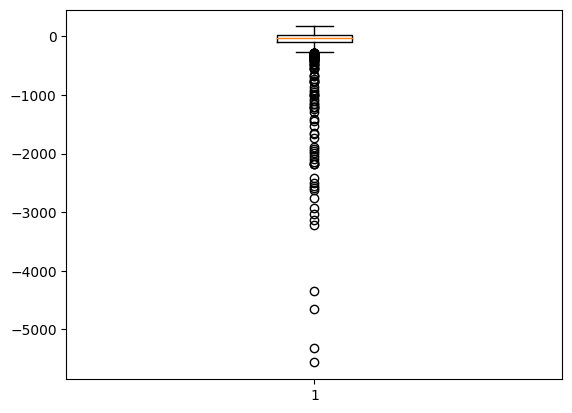

In [105]:
plt.boxplot(pred_df["Percentage Difference (%)"])

We will drop Overall, Value and Potential Column.

In [106]:
# import statsmodels.api as sm
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# vif_data = df[df.columns[df.columns.isin(["Age","Overall","Potential", "Value", "Wage","International Reputation", "Skill Moves","Joined","Height", "Weight", "Release Clause"])]]

# vif_info = pd.DataFrame()
# vif_info['VIF'] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
# vif_info['Column'] = vif_data.columns
# vif_info.sort_values('VIF', ascending=False)